# This notebook will take your regression or classification problem, the y variables (dependent) and x variables (independent) and determine which have what level of contribution to your dataset.
## This will allow you to visualize the information context of Xn to Y, and decide what to keep in future analyses, such as development of lienar regression

In [7]:
#Imports
import os
import glob as glob
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
#Calculate Correlation
from scipy.stats import pearsonr
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import platform

In [8]:
conn_path = r'/Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_data/derivative_metadata/quantitative_atrophy/subiculum_atrophy/ad_pd_full_data_gm_z_scores.csv'
#----------------------------------------------------------------DO NOT EDIT!----------------------------------------------------------------
analysis = 'joint_distribution_testing'
out_dir = os.path.join(conn_path.split('.')[0], f'{analysis}')

save = True
if os.path.exists(out_dir):
    pass
else:
    os.makedirs(out_dir)

## Import Pre-prepared Regression Data

## Prepare for regression

In [14]:
#----------------------------------------------------------------user input above----------------------------------------------------------------
from calvin_utils.dataframe_utilities import remove_column_spaces
data_df = pd.read_csv(conn_path)
data_df = remove_column_spaces(data_df.reset_index(drop=True))
# 
# display(data_df)

In [15]:
#Select specific subgroup
# outlier_index = (data_df['percent_change_adascog11'] <= -50)
# data_df = data_df.loc[outlier_index, :]

#Remove outlier
outlier_index=[11, 47, 48, 49]
data_df = data_df.drop(index=outlier_index)
data_df.reset_index(drop=True, inplace=True)

try:
    data_df.pop('Patient_#_CDR,_ADAS')
    data_df.pop('Subiculum_CSF_Z_Score')
    data_df.pop('Subiculum')
    # data_df.pop('temporal')
    # data_df.pop('occipital')
    # data_df.pop('cerebellar')
    # data_df.pop('sbc_wm_zscores')
    # data_df.pop('left_hpc_wm_zscores')
    # data_df.pop('left_hpc_z_scores')	
    # data_df.pop('zscore_left_hpc_csf')	
    # data_df.pop('sbc_szcore')
    data_df.pop('ID')   
    data_df.pop('preOP')
    data_df.pop('postOP')
    data_df.pop('diff. Mattis')
    # data_df.pop('Age')
    data_df.pop('perc_change_mattis')
    data_df.pop('Unnamed: 0')
    # data_df.dropna(inplace=True)
    # data_df.reset_index(drop=True, inplace=True)

except:
    print('none to pop')

#move outcomes to start
# first_column = data_df.pop('Patient # CDR, ADAS')  # Remove column and store it in a variable
# data_df.insert(0, 'perc_improvement', first_column)  # Insert column at the first position


data_df.head(2)

none to pop


,Age,%_Change_from_baseline_(ADAS-Cog11),Subiculum_Connectivity,Subiculum_Grey_Matter,Subiculum_White_Matter,Subiculum_CSF,Subiculum_Total,Disease,Temporal,Frontal,Parietal,Cerebellum,Insula,Occipital
0,62,-21.428571,56.864683,1.646994,0.510111,2.975675,1.280978,Alzheimer,-1.023191,0.996701,-0.761368,1.292918,1.095077,-1.147482
1,77,-36.363636,52.970984,-0.865158,-1.615736,0.740780,-1.560273,Alzheimer,-2.856390,-1.100899,-1.443009,-1.521224,-1.833263,-1.845638


In [16]:
#Standardize the data
preserved_df = data_df.copy()
from sklearn.preprocessing import StandardScaler

#Rename the outcome variable
outcome_variable = popped_out = data_df.pop('%_Change_from_baseline_(ADAS-Cog11)')
data_df['outcome'] = outcome_variable

# Remove anything you don't want to standardize
cols_not_to_standardize = ['Disease', 'Age', 'Subiculum_Connectivity']
# Select the columns to be standardized
try:
    cols_to_standardize = [col for col in data_df.columns if col not in cols_not_to_standardize]
except:
    print('No columns to standardize')
# Standardize
scaler = StandardScaler()
# data_df[cols_to_standardize] = scaler.fit_transform(data_df[cols_to_standardize])

data_df

,Age,Subiculum_Connectivity,Subiculum_Grey_Matter,Subiculum_White_Matter,Subiculum_CSF,Subiculum_Total,Disease,Temporal,Frontal,Parietal,Cerebellum,Insula,Occipital,outcome
0,62,56.864683,1.646994,0.510111,2.975675,1.280978,Alzheimer,-1.023191,0.996701,-0.761368,1.292918,1.095077,-1.147482,-21.428571
1,77,52.970984,-0.865158,-1.615736,0.740780,-1.560273,Alzheimer,-2.856390,-1.100899,-1.443009,-1.521224,-1.833263,-1.845638,-36.363636
2,76,62.459631,0.319460,-0.796399,0.532453,-0.341032,Alzheimer,-1.347207,-0.888490,-0.311940,-0.847638,-0.939795,0.179233,-78.947368
3,65,59.611631,-0.440643,-0.159752,0.405263,-0.358042,Alzheimer,-2.564422,-0.574506,-1.538464,-0.427482,-1.460534,-0.906022,-129.411765
4,50,57.928350,-0.328427,-0.229875,-0.988805,-0.339817,Alzheimer,-1.191519,-1.272936,-1.830548,0.129338,-0.729429,-0.060613,-10.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,58,18.674670,6.973009,2.352260,6.973009,0.872723,Parkinson,2.852375,5.232359,2.912696,4.106968,2.966567,1.973524,-1.388889
68,64,15.353030,-8.205764,5.376292,-8.205764,8.959061,Parkinson,-9.459474,-9.775730,-10.219665,-9.374411,-8.511720,-9.573909,1.449275
69,60,15.050219,9.086053,0.302823,9.086053,1.435556,Parkinson,3.638776,3.107560,5.125421,3.789381,4.226254,3.277476,-1.398601
70,52,17.382020,8.416993,1.409619,8.416993,-0.365509,Parkinson,4.082959,5.261292,5.782189,4.624409,5.334244,3.782229,-2.797203


In [17]:
# One-hot encode as needed
# data_df['interaction'] = data_df['Subiculum_Grey_Matter']*data_df['Subiculum_Connectivity']
data_df['Disease'] = np.where(data_df['Disease'] == 'Alzheimer', 1, 0)
# data_df['Age'] = np.where(data_df['Age'] <= 65, 0, 1)

data_df


,Age,Subiculum_Connectivity,Subiculum_Grey_Matter,Subiculum_White_Matter,Subiculum_CSF,Subiculum_Total,Disease,Temporal,Frontal,Parietal,Cerebellum,Insula,Occipital,outcome
0,62,56.864683,1.646994,0.510111,2.975675,1.280978,1,-1.023191,0.996701,-0.761368,1.292918,1.095077,-1.147482,-21.428571
1,77,52.970984,-0.865158,-1.615736,0.740780,-1.560273,1,-2.856390,-1.100899,-1.443009,-1.521224,-1.833263,-1.845638,-36.363636
2,76,62.459631,0.319460,-0.796399,0.532453,-0.341032,1,-1.347207,-0.888490,-0.311940,-0.847638,-0.939795,0.179233,-78.947368
3,65,59.611631,-0.440643,-0.159752,0.405263,-0.358042,1,-2.564422,-0.574506,-1.538464,-0.427482,-1.460534,-0.906022,-129.411765
4,50,57.928350,-0.328427,-0.229875,-0.988805,-0.339817,1,-1.191519,-1.272936,-1.830548,0.129338,-0.729429,-0.060613,-10.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,58,18.674670,6.973009,2.352260,6.973009,0.872723,0,2.852375,5.232359,2.912696,4.106968,2.966567,1.973524,-1.388889
68,64,15.353030,-8.205764,5.376292,-8.205764,8.959061,0,-9.459474,-9.775730,-10.219665,-9.374411,-8.511720,-9.573909,1.449275
69,60,15.050219,9.086053,0.302823,9.086053,1.435556,0,3.638776,3.107560,5.125421,3.789381,4.226254,3.277476,-1.398601
70,52,17.382020,8.416993,1.409619,8.416993,-0.365509,0,4.082959,5.261292,5.782189,4.624409,5.334244,3.782229,-2.797203


## Manipulate DF

Remove Rows

In [18]:
#Drop a specific set of rows
# data_df = data_df[data_df['Age'] > 65]
# data_df = data_df[data_df['Disease'] != 0]
data_df

,Age,Subiculum_Connectivity,Subiculum_Grey_Matter,Subiculum_White_Matter,Subiculum_CSF,Subiculum_Total,Disease,Temporal,Frontal,Parietal,Cerebellum,Insula,Occipital,outcome
0,62,56.864683,1.646994,0.510111,2.975675,1.280978,1,-1.023191,0.996701,-0.761368,1.292918,1.095077,-1.147482,-21.428571
1,77,52.970984,-0.865158,-1.615736,0.740780,-1.560273,1,-2.856390,-1.100899,-1.443009,-1.521224,-1.833263,-1.845638,-36.363636
2,76,62.459631,0.319460,-0.796399,0.532453,-0.341032,1,-1.347207,-0.888490,-0.311940,-0.847638,-0.939795,0.179233,-78.947368
3,65,59.611631,-0.440643,-0.159752,0.405263,-0.358042,1,-2.564422,-0.574506,-1.538464,-0.427482,-1.460534,-0.906022,-129.411765
4,50,57.928350,-0.328427,-0.229875,-0.988805,-0.339817,1,-1.191519,-1.272936,-1.830548,0.129338,-0.729429,-0.060613,-10.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,58,18.674670,6.973009,2.352260,6.973009,0.872723,0,2.852375,5.232359,2.912696,4.106968,2.966567,1.973524,-1.388889
68,64,15.353030,-8.205764,5.376292,-8.205764,8.959061,0,-9.459474,-9.775730,-10.219665,-9.374411,-8.511720,-9.573909,1.449275
69,60,15.050219,9.086053,0.302823,9.086053,1.435556,0,3.638776,3.107560,5.125421,3.789381,4.226254,3.277476,-1.398601
70,52,17.382020,8.416993,1.409619,8.416993,-0.365509,0,4.082959,5.261292,5.782189,4.624409,5.334244,3.782229,-2.797203


remove columns

In [19]:
print(data_df.columns)


Index(['Age', 'Subiculum_Connectivity', 'Subiculum_Grey_Matter',
       'Subiculum_White_Matter', 'Subiculum_CSF', 'Subiculum_Total', 'Disease',
       'Temporal', 'Frontal', 'Parietal', 'Cerebellum', 'Insula', 'Occipital',
       'outcome'],
      dtype='object')


In [20]:
# Tailor the Dataframe
data_df = data_df.loc[:, ['Age', 'Disease', 'outcome']]
data_df

,Age,Disease,outcome
0,62,1,-21.428571
1,77,1,-36.363636
2,76,1,-78.947368
3,65,1,-129.411765
4,50,1,-10.526316
...,...,...,...
67,58,0,-1.388889
68,64,0,1.449275
69,60,0,-1.398601
70,52,0,-2.797203


In [21]:
# over = data_df['basline'] >= np.mean(data_df['basline'])
# under = data_df['basline'] < np.mean(data_df['basline'])
# data_df['basline'][over] = 1
# data_df['basline'][under] = 0

# display(data_df)
# print(np.max(data_df.age))
mc_test = data_df.copy()
mc_test.pop('outcome')
# mc_test = mc_test.loc[:, ['Ventral_Attention', 'Limbic']]
# mc_test['interaction'] = mc_test['Limbic']*mc_test['Ventral_Attention']
from calvin_utils.statistical_measurements import calculate_vif
calculate_vif(mc_test)

,features,VIF
0,Age,3.222836
1,Disease,3.222836


,count,mean,std,min,25%,50%,75%,max
Age,72.0,63.750000,9.044102,46.000000,57.750000,64.000000,72.0,79.000000
Disease,72.0,0.638889,0.483693,0.000000,0.000000,1.000000,1.0,1.000000
outcome,72.0,-24.173205,43.251602,-207.692308,-37.740385,-5.217832,0.0,54.545455


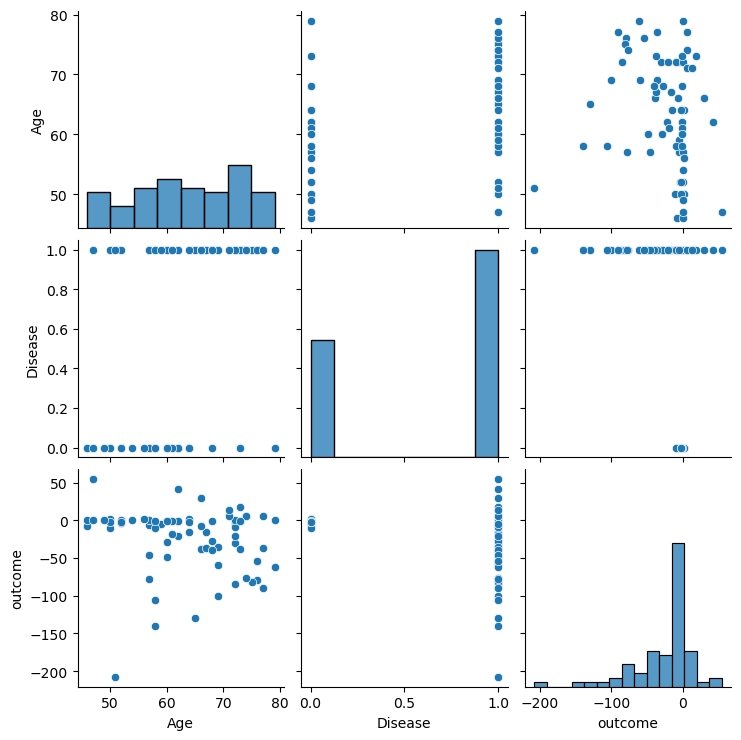

In [22]:
## GET INFORMATION ABOUT THE DATA
sns.pairplot(data_df)
data_df.describe().transpose()


## Assess a specific model/

In [461]:
print(data_df.columns)


Index(['Age', 'Subiculum_Connectivity', 'Subiculum_Grey_Matter',
       'Subiculum_White_Matter', 'Subiculum_CSF', 'Subiculum_Total', 'Disease',
       'Temporal', 'Frontal', 'Parietal', 'Cerebellum', 'Insula', 'Occipital',
       'outcome'],
      dtype='object')


In [528]:
import statsmodels.formula.api as smf

formula = 'outcome~ Subiculum_Connectivity*Frontal'
#----------------------------------------------------------------DO NOT TOUCH
results = smf.ols(formula, data=data_df).fit()
print(results.summary2())

                          Results: Ordinary least squares
Model:                    OLS                    Adj. R-squared:           0.154   
Dependent Variable:       outcome                AIC:                      486.1240
Date:                     2023-06-28 00:31       BIC:                      493.4385
No. Observations:         46                     Log-Likelihood:           -239.06 
Df Model:                 3                      F-statistic:              3.741   
Df Residuals:             42                     Prob (F-statistic):       0.0181  
R-squared:                0.211                  Scale:                    2094.5  
-----------------------------------------------------------------------------------
                                 Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
-----------------------------------------------------------------------------------
Intercept                      -133.1500 125.0853 -1.0645 0.2932 -385.5823 119.2823
Subiculum_Connecti

In [464]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import LeaveOneOut
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

#-----------------------------------------------------------------------------DO NOT TOUCH THIS!----------------------------------------------------------------
# Assuming data_df is already defined
loo = LeaveOneOut()
loo.get_n_splits(data_df)

models = []
squared_error_list = []
predictions = []
actual_values = []

for train_index, test_index in loo.split(data_df):
    train_data, test_data = data_df.iloc[train_index], data_df.iloc[test_index]

    model = smf.ols(f'{formula.split(" ~ ")[0]}'' ~ 'f'{formula.split(" ~ ")[1]}', data=train_data).fit()
    models.append(model)

    test_x = test_data.drop(columns=[f'{formula.split(" ~ ")[0]}'])
    test_y = test_data[f'{formula.split(" ~ ")[0]}']
    pred_y = model.predict(test_x)

    squared_error = np.square(pred_y - test_y)
    squared_error_list.extend(squared_error)

    predictions.extend(pred_y)
    actual_values.extend(test_y)

average_squared_error = np.mean(squared_error_list)
average_rmse = np.sqrt(average_squared_error)
correlation, _ = pearsonr(predictions, actual_values)

print(f"LOOCV - Average Root Mean Squared Error: {average_rmse}")
print(f"Pearson Correlation Coefficient: {correlation}")


LOOCV - Average Root Mean Squared Error: 43.86697523669965
Pearson Correlation Coefficient: 0.19611349440908318


In [450]:
import statsmodels
def structural_coefficients(model: statsmodels.regression.linear_model.RegressionResultsWrapper, 
                            data: pd.DataFrame) -> pd.DataFrame:
    """
    This function calculates the structural coefficients of a linear regression model, along with their 
    associated model coefficients (beta weights). It also computes a 'suppressor index' which indicates 
    the likelihood of a variable being a suppressor variable (high beta weight, near-zero structural coefficient).
    A suppressor index over 10 is a good heuristic for identifying a suppressor variable
    
    Parameters:
    model (statsmodels.regression.linear_model.RegressionResultsWrapper): The fitted linear regression model.
    data (pd.DataFrame): The dataset used in the model.
    
    Returns:
    structural_coefs_df (pd.DataFrame): A dataframe containing the predictors, their structural coefficients,
                                        model coefficients (beta weights), and suppressor index.
                                        
                                        If the sum of the structure coefficients is higher than 1, they are correlated (multicollinear)
    """
    # Calculating the predicted values
    y_predicted = model.predict(data)

    # Creating a temporary dataframe to store interaction terms
    temp_df = pd.DataFrame()
    
    # Calculating the structural coefficients
    structural_coefs = {}
    for pred in model.params.index:
        if pred == 'Intercept':
            continue

        # Check if the predictor is an interaction term
        if ':' in pred:
            # Split the interaction term into its components
            components = pred.split(':')
            # Multiply the components and store the result in the temporary dataframe
            temp_product = data[components[0]]
            for component in components[1:]:
                temp_product *= data[component]
            temp_df[pred] = temp_product
        else:
            temp_df[pred] = data[pred]
        
        coef, _ = pearsonr(temp_df[pred], y_predicted)
        structural_coefs[pred] = np.square(coef)

    # Calculating the model coefficients
    model_coefs = model.params.drop('Intercept')

    # Creating a dataframe to store the results
    structural_coefs_df = pd.DataFrame(list(zip(structural_coefs.keys(), structural_coefs.values(), model_coefs.values)), 
                                       columns=['predictor', 'structural_coefficient', 'model_coefficient'])

    # Adding suppressor index column
    structural_coefs_df['suppressor_index'] = structural_coefs_df['model_coefficient'].abs() / structural_coefs_df['structural_coefficient']

    # Sorting the dataframe by the structural coefficients in descending order
    structural_coefs_df.sort_values(by='structural_coefficient', ascending=False, inplace=True)
    structural_coefs_df.reset_index(drop=True, inplace=True)

    return structural_coefs_df

In [451]:
squared_structural_coefs_df = structural_coefficients(results, data_df.copy())
squared_structural_coefs_df.to_csv(os.path.join(out_dir, 'structural_coefficient_analysis.csv'))
print('saved to: ', os.path.join(out_dir, 'structural_coefficient_analysis.csv'))
display(squared_structural_coefs_df)

saved to:  /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_data/derivative_metadata/quantitative_atrophy/subiculum_atrophy/ad_pd_full_data_csf_damage_scores/ols_linear_regression/all_subsets_regression/structural_coefficient_analysis.csv


,predictor,structural_coefficient,model_coefficient,suppressor_index
0,Frontal,0.307957,0.233945,0.759667
1,Subiculum_Connectivity:Frontal,0.259919,-0.003691,0.014202
2,Frontal:Age,0.225080,-0.003223,0.014320
3,Subiculum_Connectivity:Age,0.180845,-0.245757,1.358942
4,Subiculum_Connectivity:Frontal:Age,0.116258,0.000051,0.000435
5,Subiculum_Connectivity,0.090295,20.041450,221.954091
6,Age,0.009711,15.190291,1564.156240


In [27]:
from scipy import sqrt, mean

# Calculate the squared errors
squared_errors = (data_df['percent_change_adascog11'] - results.fittedvalues) ** 2

# Calculate the mean of the squared errors
mse = mean(squared_errors)

# Calculate the root mean squared error
rmse = sqrt(mse)

print("Root Mean Squared Error:", rmse)


KeyError: 'percent_change_adascog11'

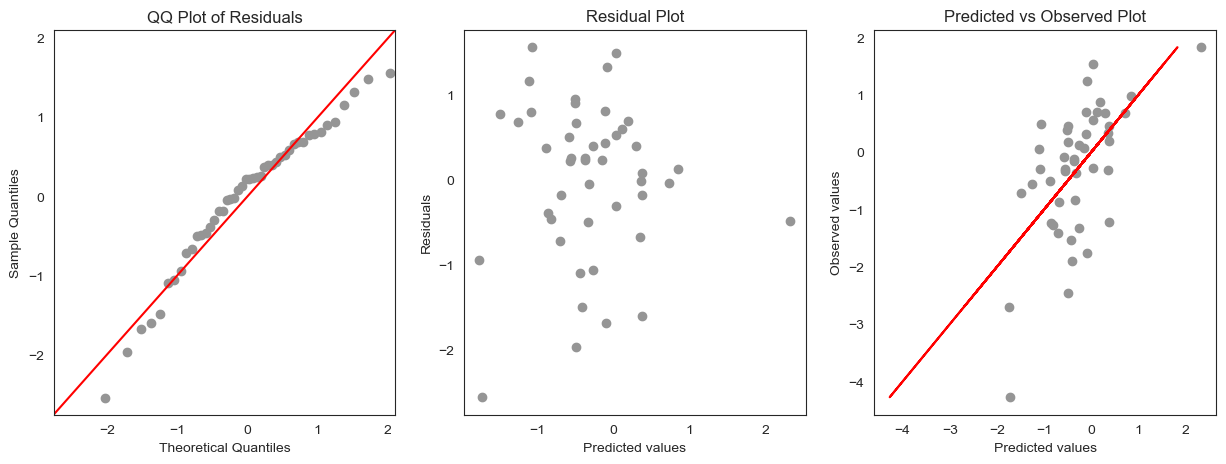

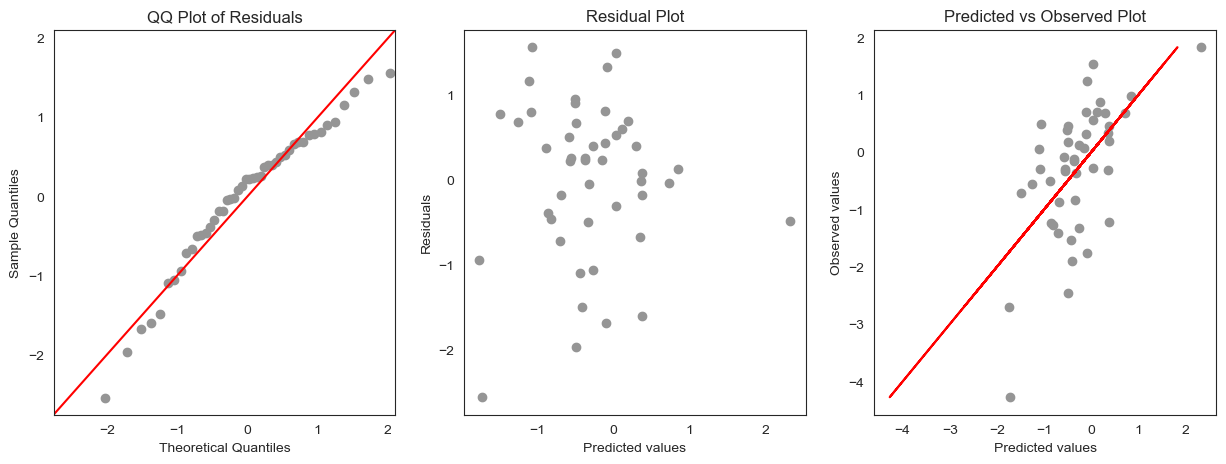

In [28]:
from calvin_utils.statistical_measurements import model_diagnostics
model_diagnostics(results)

Compare Two Lienar Regressions Using F-Test (ANOVA_LM In Statsmodels)

In [409]:
from statsmodels.stats.api import anova_lm
smaller_formula = 'outcome ~ Subiculum_Connectivity'

larger_formula = 'outcome ~ Age*Subiculum_Connectivity'


#----------------------------------------------------------------DO NOT TOUCH!----------------------------------------------------------------
table1 = anova_lm(smf.ols(smaller_formula, data=data_df).fit(), smf.ols(larger_formula, data=data_df).fit())
print(table1)

   df_resid            ssr  df_diff       ss_diff         F    Pr(>F)
0      44.0  107332.744152      0.0           NaN       NaN       NaN
1      42.0   95686.747777      2.0  11645.996375  2.555902  0.089642


In [ ]:
factor_groups = data_df.groupby(["Age", "Subiculum_Connectivity"])


#----------------------------------------------------------------do not touch
infl = results.get_influence()
resid = infl.resid_studentized_internal
plt.figure(figsize=(6, 6))
for values, group in factor_groups:
    i, j = values
    idx = group.index
    plt.scatter(
        data_df['Age'][idx],
        resid[idx],
        # marker=symbols[j],
        # color=colors[i - 1],
        s=144,
        edgecolors="black",
    )
plt.xlabel("X")
plt.ylabel("standardized resids")

## Interaction Plot
- This code will generate an interaction plot with 3 variables binarized
- x_one represents the binarized variables which compose the lines of the interaciton plot
- x_two represents the binarized variables which will be the two x-axis points of the interaction plot
- reponse represents the binarized outcomes of the interaction plot which will be the two y-axis points of the interaction plot

In [ ]:
use_interaction = False
binarize = False
#Assign variables
x_one = 'Subiculum_Grey_Matter' #This is the variable to represent the lines in the interaction plot
x_one_under_mean = 'Young' #This is what to call variables under the mean value
x_one_over_mean = 'Old' #This is what to call variables over the mean value

x_two = 'Subiculum_Connecivity' #This is the variable to represent the x_variables
x_two_under_mean = ''
x_two_over_mean = ''

response = 'outcome'
# reponse_under_mean = 'Nonresponder'
# reponse_over_mean = 'Responder'


In [ ]:
#Complex stuffy
# generate an interaction term and then plot by variables
var_1 = 'Subiculum_Grey_Matter'
var_2 = 'Subiculum_Connectivity'
x_interaction = var_1 +'_by_' + var_2
interaction_under = 'Negative Interaction'
interaction_over = 'Positive Interaction'

#----------------------------------------------------------------DO NOT MODIFY!----------------------------------------------------------------
#Mock DF Prep
mock_df = data_df.copy()
if use_interaction:
    x_two = x_interaction
    mock_df[x_two] = mock_df[var_1]*mock_df[var_2]
    if binarize:
        mock_df[x_two] = np.where(mock_df[x_two] <= 0, f'{interaction_under}', f'{interaction_over}')
else:
    if binarize:
        mock_df[x_two] = np.where(mock_df[x_two] <= mock_df[x_two].mean(), f'{x_two_under_mean}', f'{x_two_over_mean}')

if binarize:
    mock_df[x_one] = np.where(mock_df[x_one] <= mock_df[x_one].mean(), f'{x_one_under_mean}', f'{x_one_over_mean}')
mock_df

Generate 2D Interaction Plot
- This requires 2 categorical variables to be plotted with 1 continuous variable
- Done well in the 2-way ANOVA notebook

In [369]:
x_label = 'Interaction Effect'
y_label = 'Standardized Outcome'


#-----------------------------------------------------------------------------DO NOT TOUCH----------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.factorplots as smf

# Plot the interaction plot
fig = smf.interaction_plot(x=mock_df[x_two], trace=mock_df[x_one], response=mock_df[response], colors=['Red', 'Blue'], xlabel=x_label, ylabel=y_label)
# fig.set_label('Subiculum Connectivity')
# fig.set_xlabel(x_label)
fig.ylabel(y_label)

if save:
    fig.savefig(out_dir + '2D_interaction.png')
    fig.savefig(out_dir + '2D_interaction.svg')
    print(F'saved to: {out_dir}')
plt.show()


NameError: name 'mock_df' is not defined

## Use response plane to visualize interaction effect
- If the model has 2 predictors and 1 response, then choose option A
- If the model has more than 2 predictors, then choose option B. You will need to manually vary across the additional predictors

Option A

In [ ]:
Y = data_df[response]

# create grid of predictor variable values
x1 = np.linspace(min(data_df[x_one]), max(data_df[x_one]), 100)
x2 = np.linspace(min(data_df[x_two]), max(data_df[x_two]), 100)

x1v, x2v = np.meshgrid(x1, x2)
X_grid = pd.DataFrame({'const': np.ones(10000), f'{x_one}': x1v.ravel(), f'{x_two}': x2v.ravel()})

# generate response values for grid
y_pred = results.predict(X_grid).values.reshape(100, 100)

# Set plot style
sns.set_style('white')
sns.set_palette('Greys', 1, desat=1)

# plot response plane
fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x1v, x2v, y_pred, cmap='Greys', alpha=0.5)

x_data = data_df[x_one]
y_data = data_df[x_two]
z_data = Y

ax.scatter(x_data, y_data, z_data, c='red', marker='o', s=50, edgecolors='k', label='Data points')

X_data = pd.DataFrame({'const': np.ones(len(x_data)), f'{x_one}': x_data, f'{x_two}': y_data})
z_pred = results.predict(X_data)

for x, y, z_true, z_hat in zip(x_data, y_data, z_data, z_pred):
    ax.plot([x, x], [y, y], [z_true, z_hat], color='blue', linestyle='--', linewidth=1)

ax.legend()

ax.set_xlabel(x_one)
ax.set_ylabel(x_two)
ax.set_zlabel(response)

# Set the viewing angle for theplot
# ax.view_init(elev=1, azim=45)
# View x-on
ax.view_init(elev=15, azim=50)
# ax.view_init(elev=1, azim=45)

fig.tight_layout()
plt.show()

if save:
    fig.savefig(out_dir + '2_factor_interaction_sbc_orient.png')
    fig.savefig(out_dir + '2_factor_interaction_sbc_orient.svg')
    print(F'saved to: {out_dir}')


In [223]:
Y = data_df[response]

# create grid of predictor variable values
x1 = np.linspace(min(data_df[x_one]), max(data_df[x_one]), 100)
x2 = np.linspace(min(data_df[x_two]), max(data_df[x_two]), 100)


x1v, x2v = np.meshgrid(x1, x2)
X_grid = pd.DataFrame({'const': np.ones(10000), f'{x_one}': x1v.ravel(), f'{x_two}': x2v.ravel()})

# generate response values for grid
y_pred = results.predict(X_grid).values.reshape(100, 100)


#Set plot style
sns.set_style('white')
sns.set_palette('Greys', 1, desat=1)

# plot response plane
fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x1v, x2v, y_pred, cmap='Greys')

# Set the viewing angle for theplot
# ax.view_init(elev=1, azim=45)
#View x-on
# ax.view_init(elev=0, azim=0)
# ax.view_init(elev=1, azim=45)

# #----------------------------------------------------------------Generate a Plane For Visualization----------------------------------------------------
# z_range = y_pred
# x2_range = x2
# Y_grid, Z_grid = np.meshgrid(x2_range, z_range)
# X_plane = np.ones_like(Y_grid) * 51

# ax.plot_surface(X_plane, Y_grid, Z_grid, alpha=0.3, color='grey')
#----------------------------------------------------------------Set the Axes Down Here----------------------------------------------------------------
ax.set_xlabel('Age')
ax.set_ylabel('Subiculum Connectivity')
ax.set_zlabel('% Improvement ADAS-Cog 11')
fig.tight_layout()
plt.show()

if save:
    fig.savefig(out_dir + '2_factor_interaction_sbc_orient.png')
    fig.savefig(out_dir + '2_factor_interaction_sbc_orient.svg')
    print(F'saved to: {out_dir}')

NameError: name 'response' is not defined

Option B
- Visualize the formula you are using 
- Make sure your formula is represented in the data. 
- Set the 2 critical variables to x_one and x_two, with additional variables at x_three and so on.
- Set outcome to Y = __

In [ ]:
print(formula)

2 variable method

In [529]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
import os
from statsmodels.genmod.generalized_linear_model import GLMResults
from typing import List


def create_interaction_gifs(data_df: pd.DataFrame,
                            x_one: str,
                            x_two: str,
                            outcome: str,
                            results: GLMResults,
                            num_slices: int = 100,
                            gif_duration: float = 0.3) -> List[str]:
    """
    Creates gifs visualizing the interaction of two predictor variables on the outcome.
    
    Parameters
    ----------
    data_df : pd.DataFrame
        Dataframe containing the predictor variables and outcome.
    x_one : str
        Column name of the first predictor variable in the dataframe.
    x_two : str
        Column name of the second predictor variable in the dataframe.
    outcome : str
        Column name of the outcome variable in the dataframe.
    results : GLMResults
        Fitted model used for making predictions.
    num_slices : int, optional
        Number of slices to create in the gifs, default is 100.
    gif_duration : float, optional
        Duration of each frame in the gif in seconds, default is 0.3.
        
    Returns
    -------
    List[str]
        List of file paths to the created gif files.
    """
    
    # Create grid of predictor variable values
    x1 = np.linspace(min(data_df[x_one]), max(data_df[x_one]), num_slices)
    x2 = np.linspace(min(data_df[x_two]), max(data_df[x_two]), num_slices)
    x1v, x2v = np.meshgrid(x1, x2)

    # Set plot style
    sns.set_style('white')
    sns.set_palette('Greys', 1, desat=1)

    # Flattening the matrices to create a DataFrame for prediction
    X_grid = pd.DataFrame({
        x_one: x1v.ravel(),
        x_two: x2v.ravel(),
    })

    # Generate response values for grid
    y_pred = results.predict(X_grid).values.reshape(num_slices, num_slices)

    # Collect the file paths of images
    image_paths = []

    # Create a new figure for plotting
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(x1v, x2v, y_pred, cmap='bwr', alpha=0.8)

    # Set the axes labels
    format_label = lambda x: ' '.join(word.capitalize() for word in x.split('_'))
    ax.set_xlabel(format_label(x_one))
    ax.set_ylabel(format_label(x_two))
    ax.set_zlabel(format_label(outcome))

    # Save the plot as an image file
    image_path = f'plot.png'
    plt.savefig(image_path, dpi=300)
    image_paths.append(image_path)
    plt.close()

    # Create a gif from the image file
    gif_path = '2_variable.gif'
    images = [imageio.imread(image_path) for image_path in image_paths]
    imageio.mimsave(gif_path, images, duration=gif_duration)

    # Remove the individual image file
    for image_path in image_paths:
        os.remove(image_path)

    return [gif_path]


In [530]:
x_one = 'Subiculum_Connectivity'
x_two = 'Frontal'
outcome = 'outcome'
#----------------------------------------------------------------DO NOT TOUCH THIS!----------------------------------------------------------------
create_interaction_gifs(data_df,
                            x_one,
                            x_two,
                            outcome,
                            results)

/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_12426/3751972042.py:87: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(image_path) for image_path in image_paths]


['2_variable.gif']

3 Variable Method

In [526]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
import os
from statsmodels.genmod.generalized_linear_model import GLMResults
from typing import List


def create_interaction_gifs(data_df: pd.DataFrame, 
                            x_one: str, 
                            x_two: str, 
                            x_three: str, 
                            outcome: str, 
                            results: GLMResults, 
                            num_slices: int = 100,
                            gif_duration: float = 0.3) -> List[str]:
    """
    Creates gifs visualizing the interaction of predictor variables on the outcome.
    
    Parameters
    ----------
    data_df : pd.DataFrame
        Dataframe containing the predictor variables and outcome.
    x_one : str
        Column name of the first predictor variable in the dataframe.
    x_two : str
        Column name of the second predictor variable in the dataframe.
    x_three : str
        Column name of the third predictor variable in the dataframe.
    outcome : str
        Column name of the outcome variable in the dataframe.
    results : GLMResults
        Fitted model used for making predictions.
    num_slices : int, optional
        Number of slices to create in the gifs, default is 100.
    gif_duration : float, optional
        Duration of each frame in the gif in seconds, default is 0.3.
        
    Returns
    -------
    List[str]
        List of file paths to the created gif files.
    """

    # Check if x_three is binary
    unique_values = data_df[x_three].unique()
    is_binary = len(unique_values) == 2

    # Create grid of predictor variable values
    x1 = np.linspace(min(data_df[x_one]), max(data_df[x_one]), num_slices)
    x2 = np.linspace(min(data_df[x_two]), max(data_df[x_two]), num_slices)
    
    # Set plot style
    sns.set_style('white')
    sns.set_palette('Greys', 1, desat=1)

    gif_paths = []

    if is_binary:
        for x_three_value in unique_values:
            # Flattening the matrices to create a DataFrame for prediction
            X_grid = pd.DataFrame({
                x_one: np.tile(x1, len(x2)),
                x_two: np.repeat(x2, len(x1)),
                x_three: np.ones_like(np.tile(x1, len(x2))) * x_three_value
            })

            # Generate response values for grid
            y_pred = results.predict(X_grid).values.reshape(len(x2), len(x1))

            # Create a new figure for plotting
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')

            # Plot the surface
            ax.plot_surface(np.tile(x1, (len(x2), 1)), np.repeat(x2[:, np.newaxis], len(x1), axis=1), y_pred, cmap='bwr', alpha=0.8)

            # Set the axes labels
            format_label = lambda x: ' '.join(word.capitalize() for word in x.split('_'))
            ax.set_xlabel(format_label(x_one))
            ax.set_ylabel(format_label(x_two))
            ax.set_zlabel(format_label(outcome))

            # Set the title with the actual value of x_three
            title = f'{x_three} = {x_three_value}'
            ax.set_title(title)

            # Save the plot as an image file
            image_path = f'plot_{x_three}_{x_three_value}.png'
            plt.savefig(image_path, dpi=300)
            gif_paths.append(image_path)
            plt.close()
    else:
        # Flattening the matrices to create a DataFrame for prediction
        x3 = np.linspace(min(data_df[x_three]), max(data_df[x_three]), num_slices)
        x1v, x2v, x3v = np.meshgrid(x1, x2, x3)

        X_grid = pd.DataFrame({
            x_one: x1v.ravel(),
            x_two: x2v.ravel(),
            x_three: x3v.ravel(),
        })

        # Generate response values for grid
        y_pred = results.predict(X_grid).values.reshape(num_slices, num_slices, num_slices)

        # Collect the file paths of images
        image_paths = []

        # Iterating over x3 (third predictor variable) and saving each plot as an image
        for i in range(num_slices):
            x3_slice = np.linspace(min(data_df[x_three]), max(data_df[x_three]), num_slices)[i]

            # Create a new figure for plotting
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')

            # Plot the surface
            ax.plot_surface(x1v[:, :, i], x2v[:, :, i], y_pred[:, :, i], cmap='bwr', alpha=0.8)

            # Set the axes labels
            format_label = lambda x: ' '.join(word.capitalize() for word in x.split('_'))
            ax.set_xlabel(format_label(x_one))
            ax.set_ylabel(format_label(x_two))
            ax.set_zlabel(format_label(outcome))

            # Set the title with the actual value of x_three
            title = f'{x_three} = {x3_slice:.2f}'
            ax.set_title(title)

            # Save the plot as an image file
            image_path = f'plot_slice_{i+1}.png'
            plt.savefig(image_path, dpi=300)
            image_paths.append(image_path)
            plt.close()

        # Create a gif from the image files
        gif_path = f'plots.gif'
        images = [imageio.imread(image_path) for image_path in image_paths]
        imageio.mimsave(gif_path, images, duration=gif_duration)
        gif_paths.append(gif_path)

        # Remove the individual image files
        for image_path in image_paths:
            os.remove(image_path)

    return gif_paths


# Example usage
# gifs = create_interaction_gifs(data_df, 'x_one', 'x_two', 'x_three', 'outcome', results)
# print("GIFs created:", gifs)


In [527]:
x_one = 'Subiculum_Connectivity'
x_two = 'Frontal' 
x_three = 'Age'
outcome = 'cognitive_improvement'
#----------------------------------------------------------------DO NOT TOUCH----------------------------------------------------------------
gifs = create_interaction_gifs(data_df, 
                               x_one, 
                               x_two, 
                               x_three, 
                               outcome, 
                               results)
print("GIFs created:", gifs)

/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_12426/3440313904.py:142: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(image_path) for image_path in image_paths]


GIFs created: ['plots.gif']


4 Variable Method
- 4th variable is expected to be 1-hot encoded here

In [507]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
import os
from statsmodels.genmod.generalized_linear_model import GLMResults
from typing import List


def create_interaction_gifs(data_df: pd.DataFrame, 
                            x_one: str, 
                            x_two: str, 
                            x_three: str, 
                            x_four: str, 
                            x_four_dict: dict,
                            outcome: str, 
                            results: GLMResults, 
                            num_slices: int = 100,
                            gif_duration: float = 0.3) -> List[str]:
    """
    Creates gifs visualizing the interaction of predictor variables on the outcome,
    and the effect of a one-hot encoded variable (x_four).
    
    Parameters
    ----------
    data_df : pd.DataFrame
        Dataframe containing the predictor variables and outcome.
    x_one : str
        Column name of the first predictor variable in the dataframe.
    x_two : str
        Column name of the second predictor variable in the dataframe.
    x_three : str
        Column name of the third predictor variable in the dataframe.
    x_four : str
        Column name of the one-hot encoded predictor variable (values should be 0 or 1) in the dataframe.
    x_four_list : list
        List of the x_four variables corresponding to their one hot encoded outcomes.
    outcome : str
        Column name of the outcome variable in the dataframe.
    results : GLMResults
        Fitted model used for making predictions.
    num_slices : int, optional
        Number of slices to create in the gifs, default is 100.
    gif_duration : float, optional
        Duration of each frame in the gif in seconds, default is 0.3.
        
    Returns
    -------
    List[str]
        List of file paths to the created gif files.
    """
    
    # Create grid of predictor variable values
    x1 = np.linspace(min(data_df[x_one]), max(data_df[x_one]), num_slices)
    x2 = np.linspace(min(data_df[x_two]), max(data_df[x_two]), num_slices)
    x3 = np.linspace(min(data_df[x_three]), max(data_df[x_three]), num_slices)
    x1v, x2v, x3v = np.meshgrid(x1, x2, x3)

    # Set plot style
    sns.set_style('white')
    sns.set_palette('Greys', 1, desat=1)

    gif_paths = []

    # Iterate over x_four values 0 and 1
    for x_four_value in [0, 1]:
        # Flattening the matrices to create a DataFrame for prediction
        X_grid = pd.DataFrame({
            x_one: x1v.ravel(),
            x_two: x2v.ravel(),
            x_three: x3v.ravel(),
            x_four: np.ones_like(x1v).ravel() * x_four_value
        })

        # Generate response values for grid
        y_pred = results.predict(X_grid).values.reshape(num_slices, num_slices, num_slices)

        # Collect the file paths of images
        image_paths = []

        # Iterating over x3 (third predictor variable) and saving each plot as an image
        for i in range(num_slices):
            x3_slice = np.linspace(min(data_df[x_three]), max(data_df[x_three]), num_slices)[i]
            
            # Create a new figure for plotting
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')

            # Plot the surface
            ax.plot_surface(x1v[:, :, i], x2v[:, :, i], y_pred[:, :, i], cmap='bwr', alpha=0.8)

            # Set the axes labels
            format_label = lambda x: ' '.join(word.capitalize() for word in x.split('_'))
            ax.set_xlabel(format_label(x_one))
            ax.set_ylabel(format_label(x_two))
            ax.set_zlabel(format_label(outcome))
            
            # Set the title with the actual value of x_three and x_four
            title = f'{x_four_dict[x_four_value]}, {x_three} = {x3_slice:.2f}'
            ax.set_title(title)

            # Save the plot as an image file
            image_path = f'plot_{x_four}_{x_four_dict[x_four_value]}_slice_{i+1}.png'
            plt.savefig(image_path, dpi=300)
            image_paths.append(image_path)
            plt.close()

        # Create a gif from the image files
        gif_path = f'{x_four}_{x_four_dict[x_four_value]}_plots.gif'
        images = [imageio.imread(image_path) for image_path in image_paths]
        imageio.mimsave(gif_path, images, duration=gif_duration)
        gif_paths.append(gif_path)

        # Remove the individual image files
        for image_path in image_paths:
            os.remove(image_path)

    return gif_paths


# Example usage
# gifs = create_interaction_gifs(data_df, 'Subiculum_Connectivity', 'Subiculum_Grey_Matter', 'Age', 'Disease', 'outcome', results)
# print("GIFs created:", gifs)

In [508]:
x_one = 'Subiculum_Connectivity'
x_two = 'Subiculum_Grey_Matter' 
x_three = 'Age'
x_four = 'Disease'
x_four_dict = {1: "Alzheimer's", 0: "Parkinson's"}
outcome = 'cognitive_improvement'
#----------------------------------------------------------------DO NOT TOUCH----------------------------------------------------------------
gifs = create_interaction_gifs(data_df, 
                               x_one, 
                               x_two, 
                               x_three, 
                               x_four,
                               x_four_dict,
                               outcome, 
                               results)
print("GIFs created:", gifs)

/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_12426/2034691430.py:112: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(image_path) for image_path in image_paths]
/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_12426/2034691430.py:112: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(image_path) for image_path in image_paths]


GIFs created: ["Disease_Parkinson's_plots.gif", "Disease_Alzheimer's_plots.gif"]


5 Variable Method
- This is identical to the 4 variable method, but takes the 5th variable 
and calculates is at -2 and +2 standard deviations, then plots a response plane for each.

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
import os
from statsmodels.genmod.generalized_linear_model import GLMResults
from typing import List


def create_interaction_gifs_with_5_variables(data_df: pd.DataFrame, 
                                             x_one: str, 
                                             x_two: str, 
                                             x_three: str, 
                                             x_four: str, 
                                             x_four_dict: dict,
                                             x_five: str,
                                             x_five_factor_levels: int,
                                             outcome: str, 
                                             results: GLMResults, 
                                             num_slices: int = 100,
                                             gif_duration: float = 0.3) -> List[str]:
    
    # Create grid of predictor variable values
    x1 = np.linspace(min(data_df[x_one]), max(data_df[x_one]), num_slices)
    x2 = np.linspace(min(data_df[x_two]), max(data_df[x_two]), num_slices)
    x3 = np.linspace(min(data_df[x_three]), max(data_df[x_three]), num_slices)
    x1v, x2v, x3v = np.meshgrid(x1, x2, x3)

    # Set plot style
    sns.set_style('white')
    sns.set_palette('Greys', 1, desat=1)

    gif_paths = []

    # Iterate over x_four values 0 and 1
    for x_four_value in [0, 1]:
        
        # Collect the file paths of images
        image_paths = []

        # Iterating over x3 (third predictor variable) and saving each plot as an image
        for i in range(num_slices):
            x3_slice = np.linspace(min(data_df[x_three]), max(data_df[x_three]), num_slices)[i]
            
            # Create a new figure for plotting
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')

            # Choose to use x_five mean
            x_five_mean = data_df[x_five].mean()
            x_five_std = data_df[x_five].std()
            if x_five_factor_levels == 1:
                x_five_level = [x_five_mean]
            # Choose to use x_five +/- 2 standard deviations
            else:
                x_five_level = [x_five_mean-(2*x_five_std), x_five_mean+(2*x_five_std)]
            for level in range(0, len(x_five_level)):
                
                # Flattening the matrices to create a DataFrame for prediction
                X_grid = pd.DataFrame({
                    x_one: x1v.ravel(),
                    x_two: x2v.ravel(),
                    x_three: x3v.ravel(),
                    x_four: np.ones_like(x1v).ravel() * x_four_value,
                    x_five: np.ones_like(x1v).ravel() * x_five_level[level]
                })

                # Generate response values for grid
                y_pred = results.predict(X_grid).values.reshape(num_slices, num_slices, num_slices)
                
                # Plot the surface
                cmap = 'viridis' if x_five_level[level] == data_df[x_five].mean() else ('cool' if x_five_level[level] < 0 else 'magma')
                ax.plot_surface(x1v[:, :, i], x2v[:, :, i], y_pred[:, :, i], cmap=cmap, alpha=0.5)

            # Set the axes labels
            format_label = lambda x: ' '.join(word.capitalize() for word in x.split('_'))
            ax.set_xlabel(format_label(x_one))
            ax.set_ylabel(format_label(x_two))
            ax.set_zlabel(format_label(outcome))
            
            # Set the title with the actual value of x_three and x_four
            title = f'{x_four_dict[x_four_value]}, {x_three} = {x3_slice:.2f}'
            ax.set_title(title)

            # Save the plot as an image file
            image_path = f'plot_{x_four}_{x_four_dict[x_four_value]}_slice_{i+1}.png'
            plt.savefig(image_path, dpi=300)
            image_paths.append(image_path)
            plt.close()

        # Create a gif from the image files
        gif_path = f'{x_four}_{x_four_dict[x_four_value]}_plots.gif'
        images = [imageio.imread(image_path) for image_path in image_paths]
        imageio.mimsave(gif_path, images, duration=gif_duration)
        gif_paths.append(gif_path)

        # Remove the individual image files
        for image_path in image_paths:
            os.remove(image_path)

    return gif_paths




In [151]:
x_one = 'Subiculum_Connectivity'
x_two = 'Subiculum_Grey_Matter' 
x_three = 'Age'
x_four = 'Disease'
x_four_dict = {1: "Alzheimer's", 0: "Parkinson's"}
x_five = 'Subiculum_CSF'
x_five_factor_levels = 1
outcome = 'cognitive_improvement'
#----------------------------------------------------------------DO NOT TOUCH----------------------------------------------------------------
gifs = create_interaction_gifs_with_5_variables(data_df, 
                               x_one, 
                               x_two, 
                               x_three, 
                               x_four,
                               x_four_dict,
                               x_five,
                               x_five_factor_levels,
                               outcome, 
                               results)
print("GIFs created:", gifs)

/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_14149/3352125625.py:95: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(image_path) for image_path in image_paths]
/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_14149/3352125625.py:95: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(image_path) for image_path in image_paths]


GIFs created: ["Disease_Parkinson's_plots.gif", "Disease_Alzheimer's_plots.gif"]


## Binarize the Third Variable to Visualize Direction of OLS Regressions

In [ ]:
# perform ols regressions for both groups
ols_0 = smf.ols('perc_change ~ Subiculum_ROI', data=data_df[data_df['basline'] == 0]).fit()
ols_1 = smf.ols('perc_change ~ Subiculum_ROI', data=data_df[data_df['basline'] == 1]).fit()
x = np.linspace(data_df['Subiculum_ROI'].min(), data_df['Subiculum_ROI'].max(), 100)
# plot the regression lines on the scatterplot
sns.scatterplot(x='Subiculum_ROI', y='perc_change', hue='basline', data=data_df)
sns.lineplot(x=x, y=ols_0.predict(pd.DataFrame({'Subiculum_ROI': x})), color='blue')
sns.lineplot(x=x, y=ols_1.predict(pd.DataFrame({'Subiculum_ROI': x})), color='orange')

## Copmare the Regression models

In [ ]:
from statsmodels.stats.anova import anova_lm
table5 = anova_lm(ols_0, ols_1)
print(table5)

## Generate a Fancy Response Tensor

In [ ]:
from calvin_utils.import_matrices import import_matrices_from_folder
from calvin_utils.generate_nifti import nifti_from_matrix
from nimlab import datasets as nimds
import numpy as np
from nilearn import image, plotting, maskers

#Name variables to plot
var_one = 'Limbic'
var_two = 'Ventral_Attention'
val_var_two = 65.4

#get conectivity values of interest
matrix_path = '/Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/seed_generated_networks/yeo_networks_from_thick_yeo_seeds/all_05_limbic_T.nii'
matrix = import_matrices_from_folder(matrix_path, file_pattern='')

#get conectivity values of interest
matrix_path_2 = '/Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/seed_generated_networks/yeo_networks_from_thick_yeo_seeds/all_04_ventral_attention_T.nii'
matrix_2 = import_matrices_from_folder(matrix_path, file_pattern='')


#------------------------------------------------------------------------------------------------DO NOT MODIFY!------------------------------------------------------------------------------------------------
#Set reression input values into a dataframe
input_df = pd.DataFrame()
input_df[var_one] = matrix.iloc[:,0]
input_df[var_two] = matrix_2.iloc[:,0]

from nimlab import datasets as nimds
mni_mask = nimds.get_img("mni_icbm152")
mask_data = mni_mask.get_fdata().flatten()
brain_indices = np.where(mask_data > 0)[0]
input_df = input_df.iloc[brain_indices, :]

#Standardize matrix via z score
from calvin_utils.z_score_matrix import z_score_matrix
for col in input_df.columns:
    input_df.loc[:, col] = z_score_matrix(input_df.loc[:, col])

#Display results
display(input_df)


In [ ]:
import tqdm
#Generate a new matrix from the input dataframe
responses = []

#Work on a voxel-wise basis by iterating over index
for i in tqdm.tqdm(range(0, len(input_df))):
    #Do not calculate on zero values as intercept will be applied in the regressoin
    if np.sum(input_df.iloc[i,0]) != 0:
        #Assign a temporary dataframe with values that the statsmodels model is expecting
        temp_df = pd.DataFrame({var_one: input_df.iloc[i,0], var_two: input_df.iloc[i,1]}, index=['temp_vals'])
        #Calculate the voxelwise predicted outcome at a given voxel
        responses.append(results.predict(temp_df)[0])
    else:
        #If voxel is zero-connectivity, assign zero so as to avoid application of intercept
        responses.append(0)
        
#Store responses in a dataframe
response_df = pd.DataFrame()
response_df['response_topology'] = responses
display(response_df)

In [ ]:

#Place back in brain mask
mask_data[brain_indices] = response_df.loc[:, 'response_topology']
response_toplogy = mask_data

In [ ]:
from calvin_utils.generate_nifti import view_and_save_nifti
matrix_img = view_and_save_nifti(response_toplogy, out_dir)
matrix_img

## Data Driven Search for Most Relevant Regressors
Combines:
- All possible subsets regression combined with leave-one-out cross validation
- Identifies formula with lowest RMSE and highest Pearson Correlation of predictor to observed outcome values
- Presents the optimal formulas and allows selection of which formula to interpret with structural analysis and coefficient analysis

In [479]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from tqdm import tqdm

def generate_interaction_terms(df, predictors, max_interaction_level=3):
    interaction_df = df[predictors].copy()

    def add_interaction_terms(df, columns, interaction_level):
        if interaction_level == 1:
            return df

        for col_combination in itertools.combinations(columns, interaction_level):
            interaction_term = ':'.join(col_combination)
            interaction_values = np.prod(df[list(col_combination)], axis=1)
            df[interaction_term] = interaction_values

        return add_interaction_terms(df, columns, interaction_level - 1)

    return add_interaction_terms(interaction_df, predictors, max_interaction_level)

def loocv_regression(df, interaction_df, formula, outcome_var):
    full_df = interaction_df.copy()
    full_df[outcome_var] = df[outcome_var]
    model = sm.formula.ols(formula, data=full_df).fit()
    y_actual, y_predicted = [], []
    
    for i in range(len(df)):
        x_test = interaction_df.iloc[[i]]
        x_train = interaction_df.drop(i)
        y_train = df[outcome_var].drop(i)
        
        model_train_df = x_train.join(y_train)
        model_train = sm.formula.ols(formula, data=model_train_df).fit()
        y_actual.append(df[outcome_var].iloc[i])
        y_predicted.append(model_train.predict(x_test).values[0])
    
    rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
    corr, _ = pearsonr(y_actual, y_predicted)
    return rmse, corr

def all_subsets_regression(df, outcome_var):
    predictor_columns = [col for col in df.columns if col != outcome_var]
    interaction_df = generate_interaction_terms(df, predictor_columns, max_interaction_level=3)

    results = []
    for n_predictors in tqdm(range(1, len(predictor_columns) + 1)):
        for predictor_combination in itertools.combinations(predictor_columns, n_predictors):
            formula = f"{outcome_var} ~ {' + '.join(predictor_combination)}"
            loocv_rmse, loocv_corr = loocv_regression(df, interaction_df, formula, outcome_var)

            results.append({
                'formula': formula,
                'rmse': loocv_rmse,
                'correlation': loocv_corr
            })

    results_df = pd.DataFrame(results)
    results_df.sort_values(by='correlation', ascending=False, inplace=True)
    results_df.reset_index(drop=True, inplace=True)
    return results_df


def all_subsets_regression_no_loocv(df, outcome_var):
    predictor_columns = [col for col in df.columns if col != outcome_var]

    results = []
    for n_predictors in tqdm(range(1, len(predictor_columns) + 1)):
        for predictor_combination in itertools.combinations(predictor_columns, n_predictors):
            formula = f"{outcome_var} ~ {' + '.join(predictor_combination)}"
            model = sm.formula.ols(formula, data=df).fit()

            y_actual = df[outcome_var].values
            y_predicted = model.predict(df[predictor_columns])

            rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
            corr, _ = pearsonr(y_actual, y_predicted)

            results.append({
                'formula': formula,
                'rmse': rmse,
                'correlation': corr
            })

    results_df = pd.DataFrame(results)
    results_df.sort_values(by='correlation', ascending=False, inplace=True)
    results_df.reset_index(drop=True, inplace=True)
    return results_df

In [480]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from tqdm import tqdm


def all_subsets_regression(df, outcome_var, limit_to_two_way_interactions=False):
    predictor_columns = [col for col in df.columns if col != outcome_var]

    results = []
    for n_predictors in tqdm(range(1, len(predictor_columns) + 1)):
        for predictor_combination in itertools.combinations(predictor_columns, n_predictors):
            # Check whether to limit interactions to two-way
            if limit_to_two_way_interactions and n_predictors > 1:
                # Generate combinations for two-way interactions
                interaction_combinations = itertools.combinations(predictor_combination, 2)
                interaction_terms = [' : '.join(interaction) for interaction in interaction_combinations]
                # Include both individual predictors and interaction terms
                formula = f"{outcome_var} ~ {' + '.join(predictor_combination)} + {' + '.join(interaction_terms)}"
            else:
                # Original formula generation with all possible interactions
                formula = f"{outcome_var} ~ {' * '.join(predictor_combination)}"
            
            print(formula)
            loocv_rmse, loocv_corr = loocv_regression(df, formula, outcome_var)

            results.append({
                'formula': formula,
                'rmse': loocv_rmse,
                'correlation': loocv_corr
            })

    results_df = pd.DataFrame(results)
    results_df.sort_values(by='correlation', ascending=False, inplace=True)
    results_df.reset_index(drop=True, inplace=True)
    return results_df


def loocv_regression(df, formula, outcome_var):
    model = sm.formula.ols(formula, data=df).fit()
    y_actual, y_predicted = [], []

    for i in range(len(df)):
        index_label = df.index[i]
        x_test = df.iloc[[i]].drop(outcome_var, axis=1)
        x_train = df.drop(index_label).drop(outcome_var, axis=1)
        y_train = df[outcome_var].drop(index_label)

        model_train_df = x_train.join(y_train)
        model_train = sm.formula.ols(formula, data=model_train_df).fit()
        y_actual.append(df[outcome_var].iloc[i])
        y_predicted.append(model_train.predict(x_test).values[0])

    rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
    corr, _ = pearsonr(y_actual, y_predicted)
    return rmse, corr


# Example usage:
# df = pd.read_csv('your_data.csv')
# outcome_var = 'your_outcome_variable'
# results_df = all_subsets_regression(df, outcome_var)
# print(results_df.head())

In [481]:
outcome_var = 'outcome'
limit_to_two_way_interactions = False
#----------------------------------------------------------------DO NOT TOUCH----------------------------------------------------------------
df = data_df.copy()
results_df = all_subsets_regression(df, outcome_var, limit_to_two_way_interactions=limit_to_two_way_interactions)
display(results_df)

  0%|          | 0/11 [00:00<?, ?it/s]

outcome ~ Age
outcome ~ Subiculum_Connectivity
outcome ~ Subiculum_Grey_Matter
outcome ~ Subiculum_Total
outcome ~ Disease
outcome ~ Temporal
outcome ~ Frontal
outcome ~ Parietal
outcome ~ Cerebellum
outcome ~ Insula
outcome ~ Occipital


  9%|▉         | 1/11 [00:03<00:36,  3.60s/it]

outcome ~ Age * Subiculum_Connectivity
outcome ~ Age * Subiculum_Grey_Matter
outcome ~ Age * Subiculum_Total
outcome ~ Age * Disease
outcome ~ Age * Temporal
outcome ~ Age * Frontal
outcome ~ Age * Parietal
outcome ~ Age * Cerebellum
outcome ~ Age * Insula
outcome ~ Age * Occipital
outcome ~ Subiculum_Connectivity * Subiculum_Grey_Matter
outcome ~ Subiculum_Connectivity * Subiculum_Total
outcome ~ Subiculum_Connectivity * Disease
outcome ~ Subiculum_Connectivity * Temporal
outcome ~ Subiculum_Connectivity * Frontal
outcome ~ Subiculum_Connectivity * Parietal
outcome ~ Subiculum_Connectivity * Cerebellum
outcome ~ Subiculum_Connectivity * Insula
outcome ~ Subiculum_Connectivity * Occipital
outcome ~ Subiculum_Grey_Matter * Subiculum_Total
outcome ~ Subiculum_Grey_Matter * Disease
outcome ~ Subiculum_Grey_Matter * Temporal
outcome ~ Subiculum_Grey_Matter * Frontal
outcome ~ Subiculum_Grey_Matter * Parietal
outcome ~ Subiculum_Grey_Matter * Cerebellum
outcome ~ Subiculum_Grey_Matter * Ins

 18%|█▊        | 2/11 [00:24<02:03, 13.76s/it]

outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter
outcome ~ Age * Subiculum_Connectivity * Subiculum_Total
outcome ~ Age * Subiculum_Connectivity * Disease
outcome ~ Age * Subiculum_Connectivity * Temporal
outcome ~ Age * Subiculum_Connectivity * Frontal
outcome ~ Age * Subiculum_Connectivity * Parietal
outcome ~ Age * Subiculum_Connectivity * Cerebellum
outcome ~ Age * Subiculum_Connectivity * Insula
outcome ~ Age * Subiculum_Connectivity * Occipital
outcome ~ Age * Subiculum_Grey_Matter * Subiculum_Total
outcome ~ Age * Subiculum_Grey_Matter * Disease
outcome ~ Age * Subiculum_Grey_Matter * Temporal
outcome ~ Age * Subiculum_Grey_Matter * Frontal
outcome ~ Age * Subiculum_Grey_Matter * Parietal
outcome ~ Age * Subiculum_Grey_Matter * Cerebellum
outcome ~ Age * Subiculum_Grey_Matter * Insula
outcome ~ Age * Subiculum_Grey_Matter * Occipital
outcome ~ Age * Subiculum_Total * Disease
outcome ~ Age * Subiculum_Total * Temporal
outcome ~ Age * Subiculum_Total * Frontal
outcom

 27%|██▋       | 3/11 [01:39<05:33, 41.64s/it]

outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Disease
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Temporal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Frontal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Parietal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Cerebellum
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Insula
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Total * Disease
outcome ~ Age * Subiculum_Connectivity * Subiculum_Total * Temporal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Total * Frontal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Total * Parietal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Total * Cerebellum
outcome ~ Age * Subiculum_Connectivity * Subiculum_Total * Ins

 36%|███▋      | 4/11 [04:39<11:15, 96.49s/it]

outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Temporal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Frontal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Parietal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Cerebellum
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Insula
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Disease * Temporal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Disease * Frontal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Disease * Parietal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Disease * Cerebellum
outcome ~ Age * Subi

 45%|████▌     | 5/11 [10:23<18:33, 185.66s/it]

outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Frontal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Parietal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Cerebellum
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Insula
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Temporal * Frontal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Temporal * Parietal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Temporal * Cerebellum
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Tot

 55%|█████▍    | 6/11 [28:33<41:04, 492.97s/it]

outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Parietal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Cerebellum
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Insula
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Frontal * Parietal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Frontal * Cerebellum
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Frontal * Insula
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Fronta

 64%|██████▎   | 7/11 [44:14<42:38, 639.58s/it]

outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Parietal
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Cerebellum
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Insula
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Parietal * Cerebellum
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Parietal * Insula
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Parietal * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Cerebellum * Insula
outcome ~ 

 73%|███████▎  | 8/11 [58:05<35:01, 700.48s/it]

outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Parietal * Cerebellum
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Parietal * Insula
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Parietal * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Cerebellum * Insula
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Cerebellum * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Insula * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Parietal * Cerebellum * Insula
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Ma

 82%|████████▏ | 9/11 [1:05:58<20:58, 629.46s/it]

outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Parietal * Cerebellum * Insula
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Parietal * Cerebellum * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Parietal * Insula * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Cerebellum * Insula * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Parietal * Cerebellum * Insula * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Frontal * Parietal * Cerebellum * Insula * Occipital
outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Temporal * Frontal * Parietal * Cerebellu

 91%|█████████ | 10/11 [1:08:36<08:03, 483.70s/it]

outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Subiculum_Total * Disease * Temporal * Frontal * Parietal * Cerebellum * Insula * Occipital


100%|██████████| 11/11 [1:09:02<00:00, 376.57s/it]


,formula,rmse,correlation
0,outcome ~ Age * Subiculum_Total * Disease * Temporal,39.277437,0.471785
1,outcome ~ Subiculum_Connectivity * Subiculum_Grey_Matter * Disease * Insula * Occipital,41.939333,0.467175
2,outcome ~ Subiculum_Connectivity * Subiculum_Total * Disease * Temporal,39.321528,0.446247
3,outcome ~ Subiculum_Connectivity * Subiculum_Total * Disease * Occipital,39.898063,0.438522
4,outcome ~ Age * Subiculum_Grey_Matter * Disease,39.544572,0.432439
...,...,...,...
2042,outcome ~ Age * Subiculum_Connectivity * Temporal * Parietal * Cerebellum * Insula,1208.289143,-0.116932
2043,outcome ~ Age * Subiculum_Connectivity * Disease * Temporal * Insula,67.204998,-0.164986
2044,outcome ~ Age * Subiculum_Grey_Matter * Disease * Frontal * Insula,104.038670,-0.170253
2045,outcome ~ Age * Subiculum_Connectivity * Disease * Insula * Occipital,70.294377,-0.226800


In [482]:
print('Top 20 formulas by Correlation of y-hat to y')
pd.set_option('display.max_colwidth', None)
results_df.head(20)

Top 20 formulas by Correlation of y-hat to y


,formula,rmse,correlation
0,outcome ~ Age * Subiculum_Total * Disease * Temporal,39.277437,0.471785
1,outcome ~ Subiculum_Connectivity * Subiculum_Grey_Matter * Disease * Insula * Occipital,41.939333,0.467175
2,outcome ~ Subiculum_Connectivity * Subiculum_Total * Disease * Temporal,39.321528,0.446247
3,outcome ~ Subiculum_Connectivity * Subiculum_Total * Disease * Occipital,39.898063,0.438522
4,outcome ~ Age * Subiculum_Grey_Matter * Disease,39.544572,0.432439
5,outcome ~ Age * Subiculum_Connectivity * Subiculum_Grey_Matter * Disease,45.735313,0.427984
6,outcome ~ Subiculum_Total * Disease * Temporal,39.200568,0.426834
7,outcome ~ Subiculum_Total * Disease * Occipital,39.326200,0.422079
8,outcome ~ Age * Subiculum_Total * Disease * Occipital,41.184924,0.418106
9,outcome ~ Age * Subiculum_Total * Disease * Parietal,40.633635,0.406088


In [483]:
print('Top 20 formulas by RMSE of y-hat to y')
# Sort DataFrame by 'rmse' in ascending order
rmse_df = results_df.copy().sort_values(by='rmse', ascending=True)

# Display the sorted DataFrame
rmse_df.head(20)

Top 20 formulas by RMSE of y-hat to y


,formula,rmse,correlation
6,outcome ~ Subiculum_Total * Disease * Temporal,39.200568,0.426834
0,outcome ~ Age * Subiculum_Total * Disease * Temporal,39.277437,0.471785
2,outcome ~ Subiculum_Connectivity * Subiculum_Total * Disease * Temporal,39.321528,0.446247
7,outcome ~ Subiculum_Total * Disease * Occipital,39.326200,0.422079
4,outcome ~ Age * Subiculum_Grey_Matter * Disease,39.544572,0.432439
3,outcome ~ Subiculum_Connectivity * Subiculum_Total * Disease * Occipital,39.898063,0.438522
11,outcome ~ Subiculum_Total * Disease * Frontal,39.955787,0.393775
23,outcome ~ Disease,40.257614,0.351769
19,outcome ~ Subiculum_Connectivity * Disease,40.269098,0.357591
29,outcome ~ Disease * Insula,40.440537,0.344753


In [492]:
# Printing top 5 formulas

top_five_formulas = results_df.head(5)['formula']
print("Top 5 Formulas:")
print(top_five_formulas)


print('---Lowest RMSE Information---')
index_of_min_rmse = results_df['rmse'].idxmin()
print(results_df.loc[index_of_min_rmse, 'formula'])
print('RMSE: ',results_df.loc[index_of_min_rmse, 'rmse'])
print('Pearson R: ', results_df.loc[index_of_min_rmse, 'correlation'])
print('Formula index: ', index_of_min_rmse)

print('\n---Highest Correlation Information---')
index_of_max_corr = results_df['correlation'].idxmax()
print(results_df.loc[index_of_max_corr, 'formula'])
print('RMSE: ',results_df.loc[index_of_max_corr, 'rmse'])
print('Pearson R: ', results_df.loc[index_of_max_corr, 'correlation'])
print('Formula index: ', index_of_max_corr)


Top 5 Formulas:
0                                       outcome ~ Age * Subiculum_Total * Disease * Temporal
1    outcome ~ Subiculum_Connectivity * Subiculum_Grey_Matter * Disease * Insula * Occipital
2                    outcome ~ Subiculum_Connectivity * Subiculum_Total * Disease * Temporal
3                   outcome ~ Subiculum_Connectivity * Subiculum_Total * Disease * Occipital
4                                            outcome ~ Age * Subiculum_Grey_Matter * Disease
Name: formula, dtype: object
---Lowest RMSE Information---
outcome ~ Subiculum_Total * Disease * Temporal
RMSE:  39.2005682406356
Pearson R:  0.4268336319580978
Formula index:  6

---Highest Correlation Information---
outcome ~ Age * Subiculum_Total * Disease * Temporal
RMSE:  39.27743695842613
Pearson R:  0.4717850131121982
Formula index:  0


In [493]:
import statsmodels.formula.api as smf
formula_to_test = 0
#----------------------------------------------------------------
results = smf.ols(results_df.loc[formula_to_test, 'formula'], data=df).fit()
# results = smf.ols('percent_change_adascog11 ~ Subiculum*Age*total_hippocampal_csf*frontal', data=data_df).fit()


print(results.summary2())

                              Results: Ordinary least squares
Model:                        OLS                      Adj. R-squared:             0.243   
Dependent Variable:           outcome                  AIC:                        740.6825
Date:                         2023-06-27 20:50         BIC:                        777.1092
No. Observations:             72                       Log-Likelihood:             -354.34 
Df Model:                     15                       F-statistic:                2.516   
Df Residuals:                 56                       Prob (F-statistic):         0.00648 
R-squared:                    0.403                    Scale:                      1416.9  
-------------------------------------------------------------------------------------------
                                       Coef.   Std.Err.    t    P>|t|    [0.025     0.975] 
-------------------------------------------------------------------------------------------
Intercept         

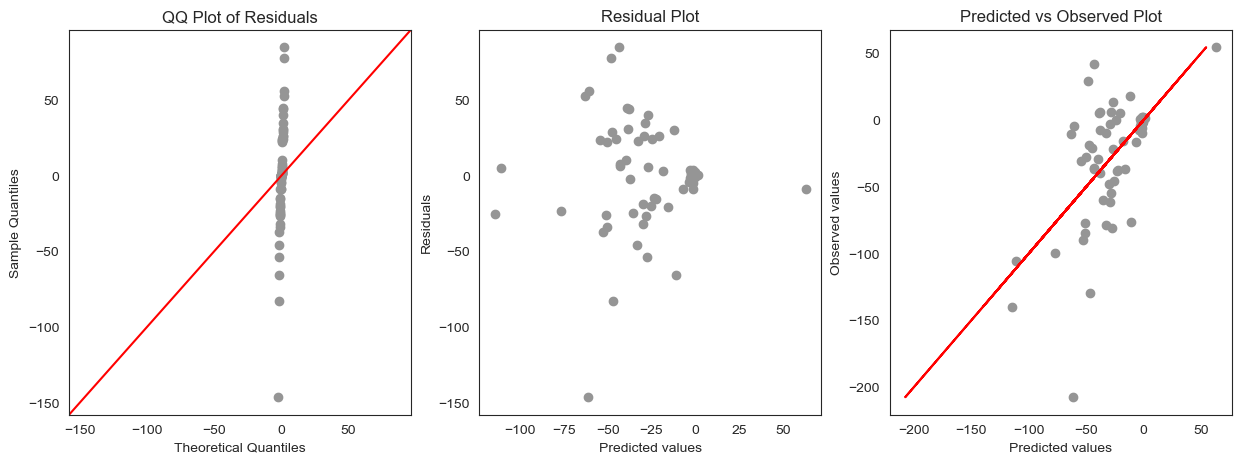

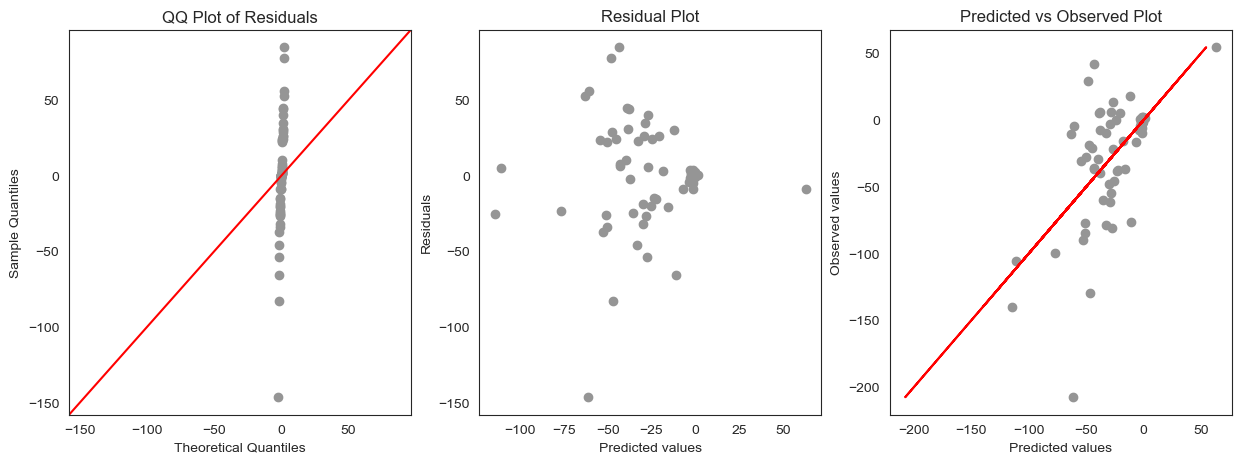

In [494]:
from calvin_utils.statistical_measurements import model_diagnostics
model_diagnostics(results)

## Find the Optimal Interaction Subset of Optimal Model by Backward Regression

In [487]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import itertools


def backward_subsets_loocv_regression(df, formula):
    # Extract outcome_var from the formula
    outcome_var = formula.split(' ~ ')[0].strip()
    
    y_actual, y_predicted = [], []

    for i in range(len(df)):
        index_label = df.index[i]
        x_test = df.iloc[[i]].drop(outcome_var, axis=1)
        x_train = df.drop(index_label).drop(outcome_var, axis=1)
        y_train = df[outcome_var].drop(index_label)

        model_train_df = x_train.join(y_train)
        model_train = smf.ols(formula, data=model_train_df).fit()
        y_actual.append(df[outcome_var].iloc[i])
        y_predicted.append(model_train.predict(x_test).values[0])

    rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
    corr, _ = pearsonr(y_actual, y_predicted)
    return rmse, corr


def serial_interaction_removal_loocv(df, formula):
    # Split the formula into the left and right side
    left, right = formula.split("~")
    
    # Get all the terms from the right side of the formula
    terms = right.strip().split("*")
    terms = [term.strip() for term in terms]
    
    # Generate all combinations of + and *
    operators_combinations = itertools.product(["+", "*"], repeat=len(terms)-1)
    
    # Generate the formulas
    formulas = []
    for operators in operators_combinations:
        combined_formula = left + " ~ " + terms[0]
        for op, term in zip(operators, terms[1:]):
            combined_formula += " " + op + " " + term
        formulas.append(combined_formula.strip())

    # Run LOOCV on each formula
    loocv_results = []
    for sub_formula in formulas:
        loocv_rmse, loocv_corr = backward_subsets_loocv_regression(df, sub_formula)
        loocv_results.append({
            'formula': sub_formula,
            'rmse': loocv_rmse,
            'correlation': loocv_corr
        })
    
    # Convert results to DataFrame, sort by correlation and reset index
    loocv_results_df = pd.DataFrame(loocv_results)
    loocv_results_df.sort_values(by='correlation', ascending=False, inplace=True)
    loocv_results_df.reset_index(drop=True, inplace=True)

    return loocv_results_df


# Example usage:
# Assuming `df` is your DataFrame, and `formula` is a string like "y ~ a * b * c"
# best_formula = "y ~ a * b * c"
# serial_loocv_df = serial_interaction_removal_loocv(df, best_formula)
# print(serial_loocv_df)

best_formula = results_df.loc[formula_to_test, 'formula']
optimal_interaction_loocv_df = serial_interaction_removal_loocv(df, best_formula)
optimal_interaction_loocv_df.head(20)

,formula,rmse,correlation
0,outcome ~ Age * Subiculum_Total * Disease * Temporal,39.277437,0.471785
1,outcome ~ Age + Subiculum_Total * Disease * Temporal,40.622807,0.372859
2,outcome ~ Age * Subiculum_Total * Disease + Temporal,42.495836,0.274848
3,outcome ~ Age * Subiculum_Total + Disease + Temporal,42.435961,0.254234
4,outcome ~ Age + Subiculum_Total + Disease + Temporal,42.095903,0.252827
5,outcome ~ Age * Subiculum_Total + Disease * Temporal,42.879795,0.230822
6,outcome ~ Age + Subiculum_Total + Disease * Temporal,42.808790,0.214701
7,outcome ~ Age + Subiculum_Total * Disease + Temporal,43.015004,0.210288


# Structural Coefficient Analysis of Optimal Model

In [488]:
import patsy

def structural_coefficients(model, data):
    # Extracting the predictor names
    predictor_names = model.model.exog_names
    if 'Intercept' in predictor_names:
        predictor_names.remove('Intercept')

    # Calculating the predicted values
    y_predicted = model.predict(data)

    # Creating a temporary dataframe to store interaction terms
    temp_df = pd.DataFrame()
    
    for pred in predictor_names:
        # Check if the predictor is an interaction term
        if ':' in pred:
            # Split the interaction term into its components
            components = pred.split(':')
            # Multiply the components and store the result in the temporary dataframe
            temp_product = data[components[0]]
            for component in components[1:]:
                temp_product *= data[component]
            temp_df[pred] = temp_product
        else:
            temp_df[pred] = data[pred]

    # Calculating the structural coefficients
    structural_coefs = {}
    for pred in predictor_names:
        coef, _ = pearsonr(temp_df[pred], y_predicted)
        structural_coefs[pred] = np.square(coef)

    # Creating a dataframe to store the results
    structural_coefs_df = pd.DataFrame(structural_coefs.items(), columns=['predictor', 'structural_coefficient'])

    # Sorting the dataframe by the structural coefficients in descending order
    structural_coefs_df.sort_values(by='structural_coefficient', ascending=False, inplace=True)
    structural_coefs_df.reset_index(drop=True, inplace=True)

    return structural_coefs_df

In [489]:
import statsmodels
def structural_coefficients(model: statsmodels.regression.linear_model.RegressionResultsWrapper, 
                            data: pd.DataFrame) -> pd.DataFrame:
    """
    This function calculates the structural coefficients of a linear regression model, along with their 
    associated model coefficients (beta weights). It also computes a 'suppressor index' which indicates 
    the likelihood of a variable being a suppressor variable (high beta weight, near-zero structural coefficient).
    A suppressor index over 10 is a good heuristic for identifying a suppressor variable
    
    Parameters:
    model (statsmodels.regression.linear_model.RegressionResultsWrapper): The fitted linear regression model.
    data (pd.DataFrame): The dataset used in the model.
    
    Returns:
    structural_coefs_df (pd.DataFrame): A dataframe containing the predictors, their structural coefficients,
                                        model coefficients (beta weights), and suppressor index.
                                        
                                        If the sum of the structure coefficients is higher than 1, they are correlated (multicollinear)
    """
    # Calculating the predicted values
    y_predicted = model.predict(data)

    # Creating a temporary dataframe to store interaction terms
    temp_df = pd.DataFrame()
    
    # Calculating the structural coefficients
    structural_coefs = {}
    for pred in model.params.index:
        if pred == 'Intercept':
            continue

        # Check if the predictor is an interaction term
        if ':' in pred:
            # Split the interaction term into its components
            components = pred.split(':')
            # Multiply the components and store the result in the temporary dataframe
            temp_product = data[components[0]]
            for component in components[1:]:
                temp_product *= data[component]
            temp_df[pred] = temp_product
        else:
            temp_df[pred] = data[pred]
        
        coef, _ = pearsonr(temp_df[pred], y_predicted)
        structural_coefs[pred] = np.square(coef)

    # Calculating the model coefficients
    model_coefs = model.params.drop('Intercept')

    # Creating a dataframe to store the results
    structural_coefs_df = pd.DataFrame(list(zip(structural_coefs.keys(), structural_coefs.values(), model_coefs.values)), 
                                       columns=['predictor', 'structural_coefficient', 'model_coefficient'])

    # Adding suppressor index column
    structural_coefs_df['suppressor_index'] = structural_coefs_df['model_coefficient'].abs() / structural_coefs_df['structural_coefficient']

    # Sorting the dataframe by the structural coefficients in descending order
    structural_coefs_df.sort_values(by='structural_coefficient', ascending=False, inplace=True)
    structural_coefs_df.reset_index(drop=True, inplace=True)

    return structural_coefs_df

In [490]:
squared_structural_coefs_df = structural_coefficients(results, df.copy())
squared_structural_coefs_df.to_csv(os.path.join(out_dir, 'structural_coefficient_analysis.csv'))
print('saved to: ', os.path.join(out_dir, 'structural_coefficient_analysis.csv'))
display(squared_structural_coefs_df)

saved to:  /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_data/derivative_metadata/quantitative_atrophy/subiculum_atrophy/ad_pd_full_data_gm_z_scores/ols_linear_regression/all_subsets_regression/structural_coefficient_analysis.csv


,predictor,structural_coefficient,model_coefficient,suppressor_index
0,Disease,0.395649,-136.832752,345.843863
1,Disease:Temporal,0.260366,-3.503333,13.455424
2,Temporal,0.257486,-11.736458,45.580923
3,Subiculum_Total,0.154383,-10.923196,70.753874
4,Age:Subiculum_Total,0.127593,0.177510,1.391218
5,Age:Disease:Temporal,0.071143,0.148083,2.081480
6,Subiculum_Total:Disease:Temporal,0.063061,90.381628,1433.239305
7,Age:Subiculum_Total:Temporal,0.062493,-0.045617,0.729949
8,Age,0.051242,-0.751411,14.663991
9,Subiculum_Total:Temporal,0.029372,2.810536,95.687680


In [491]:
#If the sum of the structure coefficients is higher than 1, they are correlated
print(squared_structural_coefs_df.loc[:, 'structural_coefficient'].sum())


1.4834945026778472


In [ ]:
print(results.summary2())


## Check optimal model without LOOCV

In [ ]:
df = df.copy()
no_loocv_results_df = all_subsets_regression_no_loocv(df, outcome_var)
no_loocv_results_df.head(10)



In [ ]:
# Printing top 5 formulas
no_loocv_top_five_formulas = no_loocv_results_df.head(10)['formula']
print("Top 5 Formulas:")
print(no_loocv_top_five_formulas)

In [ ]:
import statsmodels.formula.api as smf
formula_to_test = 0
#----------------------------------------------------------------
results = smf.ols(no_loocv_results_df.loc[formula_to_test, 'formula'], data=df).fit()
print(results.summary2())